# IPL Dataset Exploratory Data Analysis (2008-2024)

## Matches Dataset and Info

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")


In [64]:
matches = pd.read_csv("matches.csv")
deliveries = pd.read_csv("deliveries.csv")

matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [65]:
matches.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

## Count of matches won by each team

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


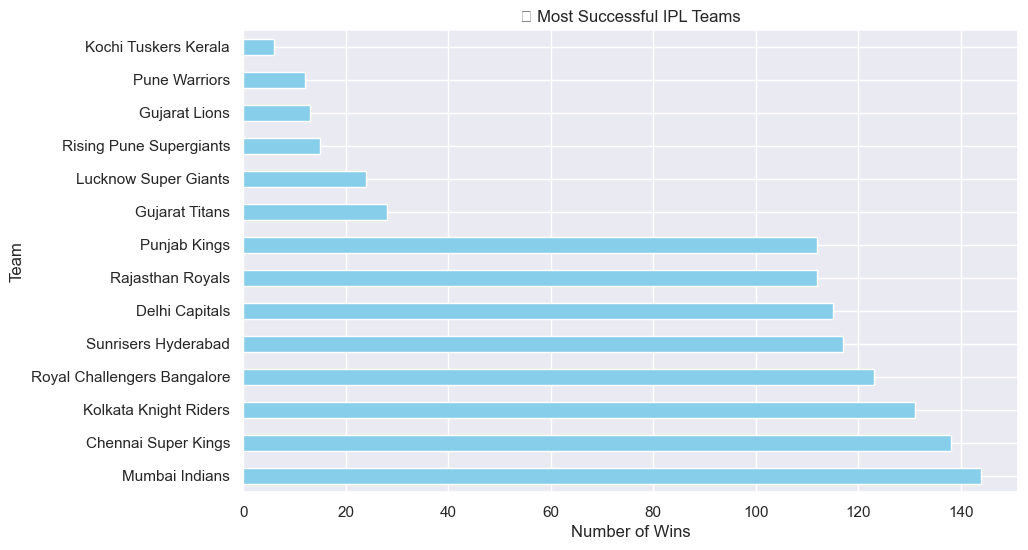

In [ ]:

team_rename_dict = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
}

matches['winner'] = matches['winner'].replace(team_rename_dict)



matches['winner'].value_counts().plot(kind='barh', color='skyblue', figsize=(10,6))
plt.title("🏆 Most Successful IPL Teams")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()


## Count of matches per season

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


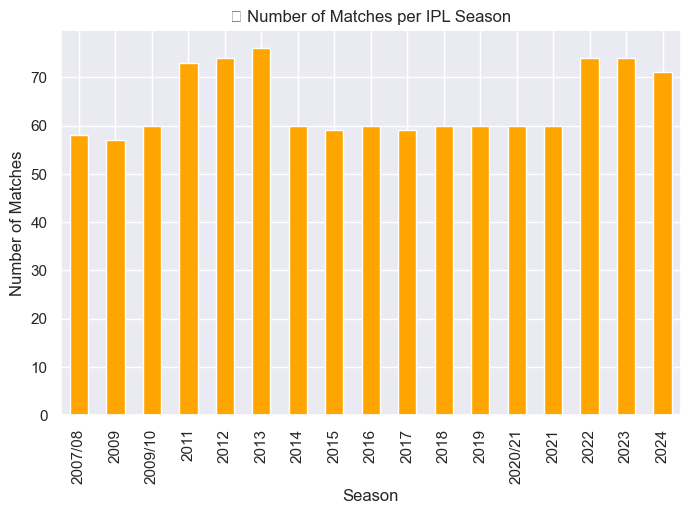

In [ ]:

matches['season'].value_counts().sort_index().plot(kind='bar', color='orange', figsize=(8,5))
plt.title("📅 Number of Matches per IPL Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.show()


## Top 10 Players with Most 'Player of the Match' Awards

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


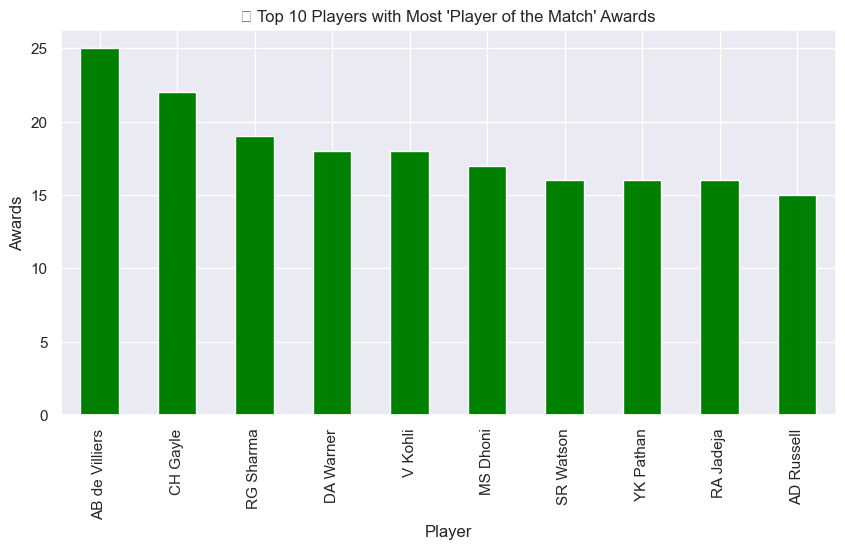

In [68]:
matches['player_of_match'].value_counts().head(10).plot(kind='bar', color='green', figsize=(10,5))
plt.title("🌟 Top 10 Players with Most 'Player of the Match' Awards")
plt.xlabel("Player")
plt.ylabel("Awards")
plt.show()


## How often toss winner wins the match

In [ ]:
toss_match_win = matches[matches['toss_winner'] == matches['winner']]
percentage = (len(toss_match_win) / len(matches)) * 100
print(f"Toss winner also won the match in {percentage:.2f}% of games.")


Toss winner also won the match in 41.55% of games.


## Deliveries Dataset and Info

In [70]:
deliveries.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [75]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

## Top 10 wicket takers in IPL

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


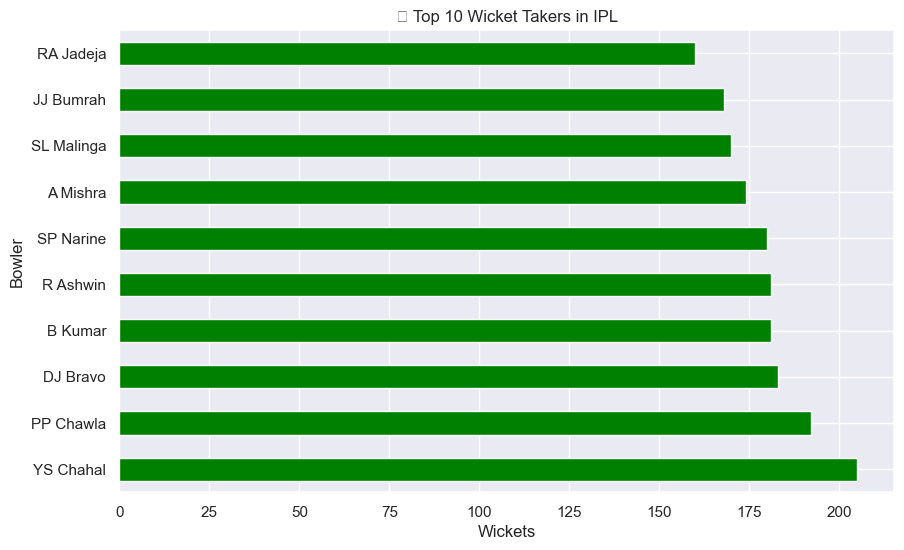

In [71]:
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
wickets = wickets[wickets['dismissal_kind']!= 'run out']

top_bowlers = wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)

top_bowlers.plot(kind='barh', color='green', figsize=(10,6))
plt.title("🎯 Top 10 Wicket Takers in IPL")
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()

## Top 10 Players with Most Sixes

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128163 (\N{BOMB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


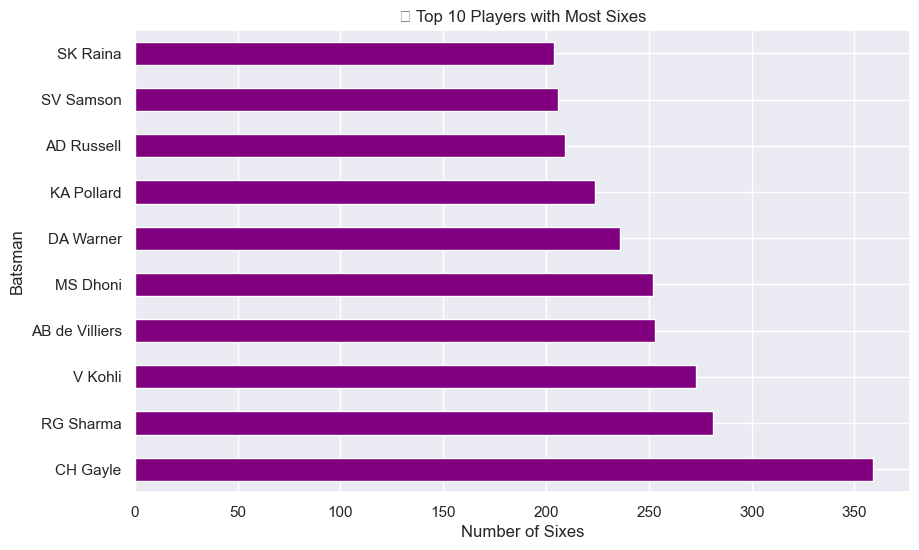

In [72]:
sixes = deliveries[deliveries['batsman_runs'] == 6]
top_sixers = sixes['batter'].value_counts().head(10)

top_sixers.plot(kind='barh', color='purple', figsize=(10,6))
plt.title("💣 Top 10 Players with Most Sixes")
plt.xlabel("Number of Sixes")
plt.ylabel("Batsman")
plt.show()


## Top Strike Rates (Min 300 balls faced)

c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


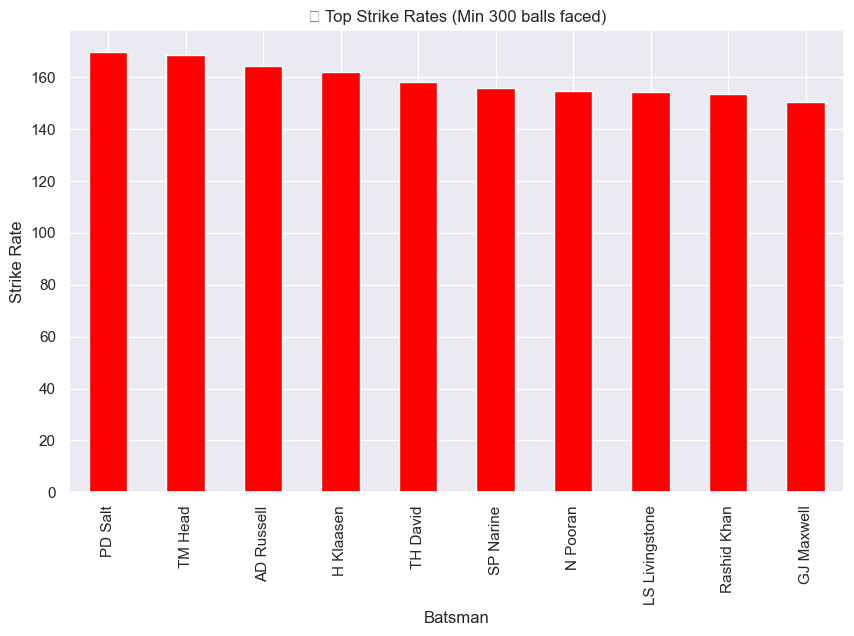

In [73]:
balls_faced = deliveries.groupby('batter')['ball'].count()
total_runs = deliveries.groupby('batter')['batsman_runs'].sum()

strike_rate = (total_runs / balls_faced) * 100
strike_rate = strike_rate[balls_faced > 300]  # only regular players
strike_rate.sort_values(ascending=False).head(10).plot(kind='bar', color='red', figsize=(10,6))

plt.title("⚡ Top Strike Rates (Min 300 balls faced)")
plt.ylabel("Strike Rate")
plt.xlabel("Batsman")
plt.show()


## Top 10 IPL batsman in terms of career stats- Total Runs Scored > 2500, SR > 125, Avg > 35

                Total Runs  Balls Faced  Dismissals        Avg          SR
V Kohli             8014.0       6236.0       207.0  38.714976  128.511867
DA Warner           6567.0       4849.0       164.0  40.042683  135.429986
MS Dhoni            5243.0       3947.0       134.0  39.126866  132.835065
AB de Villiers      5181.0       3487.0       130.0  39.853846  148.580442
CH Gayle            4997.0       3516.0       126.0  39.658730  142.121729
KL Rahul            4689.0       3578.0       105.0  44.657143  131.050866
F du Plessis        4571.0       3435.0       127.0  35.992126  133.071325
JC Buttler          3583.0       2519.0        95.0  37.715789  142.238984
RR Pant             3297.0       2296.0        93.0  35.451613  143.597561
Shubman Gill        3216.0       2432.0        85.0  37.835294  132.236842


c:\Users\BIT\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


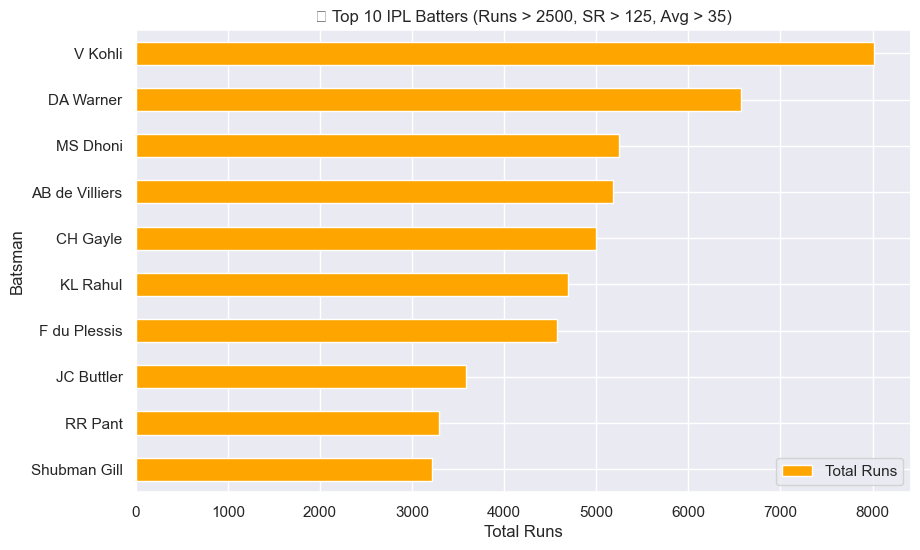

In [ ]:
total_runs = deliveries.groupby('batter')['batsman_runs'].sum()

balls_faced = deliveries.groupby('batter')['ball'].count()

outs_df = deliveries[deliveries['player_dismissed'].notnull()]
outs = outs_df['player_dismissed'].value_counts()

batting_df = pd.DataFrame({
    'Total Runs': total_runs,
    'Balls Faced': balls_faced,
    'Dismissals': outs
})


batting_df['Dismissals'] = batting_df['Dismissals'].fillna(0)

batting_df = batting_df[batting_df['Dismissals'] > 0]

batting_df['Avg'] = batting_df['Total Runs'] / batting_df['Dismissals']
batting_df['SR'] = (batting_df['Total Runs'] / batting_df['Balls Faced']) * 100

filtered = batting_df[
    (batting_df['SR'] > 125) &
    (batting_df['Total Runs'] > 2500) &
    (batting_df['Avg'] > 35)
]


top_batters = filtered.sort_values(by='Total Runs', ascending=False).head(10)
print(top_batters)


top_batters[['Total Runs']].plot(kind='barh', figsize=(10,6), color='orange')
plt.title("🏏 Top 10 IPL Batters (Runs > 2500, SR > 125, Avg > 35)")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.gca().invert_yaxis()
plt.show()